In [178]:
import numpy as np
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt

In [230]:
location = Location(latitude = 55.75493972627531, longitude = 37.70909655559249,
                    tz = 'Europe/Moscow', altitude = 156 , name = 'Moscow Power Engineering Institute')

In [180]:
print(location)

Location: 
  name: Moscow Power Engineering Institute
  latitude: 55.75493972627531
  longitude: 37.70909655559249
  altitude: 156
  tz: Europe/Moscow


In [181]:
from pvlib.pvsystem import PVSystem, FixedMount
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [182]:
# загрузите некоторые спецификации модуля и инвертора
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod') 
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter') 
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [183]:
system = PVSystem(surface_tilt=0, surface_azimuth=180,
                  module_parameters=sandia_module,
                  inverter_parameters=cec_inverter,
                  temperature_model_parameters=temperature_model_parameters)

modelchain = ModelChain(system, location)

In [184]:
#При печати объекта ModelChain будут отображаться его модели.
print(modelchain)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [185]:
import os

import itertools

import matplotlib.pyplot as plt

import pandas as pd

from pvlib import clearsky, atmosphere, solarposition

from pvlib.iotools import read_tmy3

In [226]:
times = pd.date_range(start='2021-01-01', end='2023-01-07', freq='1H', tz=location.tz)

In [227]:
times

DatetimeIndex(['2021-01-01 00:00:00+03:00', '2021-01-01 01:00:00+03:00',
               '2021-01-01 02:00:00+03:00', '2021-01-01 03:00:00+03:00',
               '2021-01-01 04:00:00+03:00', '2021-01-01 05:00:00+03:00',
               '2021-01-01 06:00:00+03:00', '2021-01-01 07:00:00+03:00',
               '2021-01-01 08:00:00+03:00', '2021-01-01 09:00:00+03:00',
               ...
               '2023-01-06 15:00:00+03:00', '2023-01-06 16:00:00+03:00',
               '2023-01-06 17:00:00+03:00', '2023-01-06 18:00:00+03:00',
               '2023-01-06 19:00:00+03:00', '2023-01-06 20:00:00+03:00',
               '2023-01-06 21:00:00+03:00', '2023-01-06 22:00:00+03:00',
               '2023-01-06 23:00:00+03:00', '2023-01-07 00:00:00+03:00'],
              dtype='datetime64[ns, Europe/Moscow]', length=17665, freq='H')

Text(0.5, 1.0, 'Ineichen, климатологическая мутность')

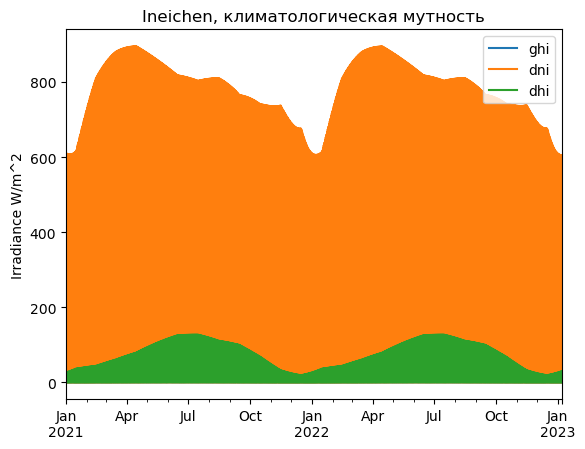

In [228]:
clear_sky = location.get_clearsky(times)  

clear_sky.plot();

plt.ylabel('Irradiance W/m^2')

plt.title('Ineichen, климатологическая мутность')

<AxesSubplot:>

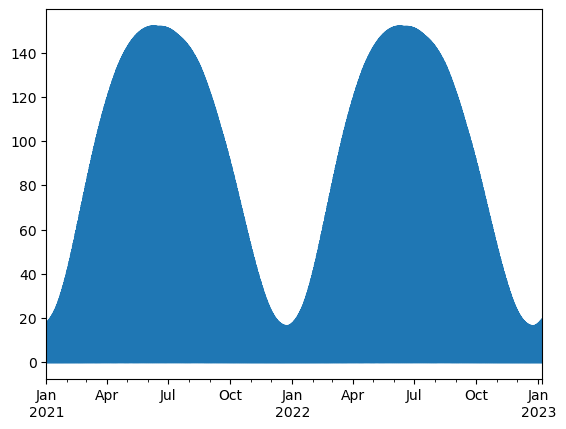

In [229]:
modelchain.run_model(clear_sky)
modelchain.results.ac.plot()